# Máster Universitario en Lógica, Computación e Inteligencia Artificial
## Inteligencia Artificial para la Ciencia de los Datos
### Proyecto de Ciencia de datos

En este segundo entregable se pide aplicar todo lo visto en la asignatura para desarrollar un proyecto de ciencia de datos que completo sobre un conjunto de datos (de libre elección). 
El objetivo final será obtener un modelo predictivo con la mayor capacidad predictiva posible, sin embargo, todas las tareas desarrolladas para obtenerlo son igualmente importantes. Esto incluye las siguientes tareas:
* Exploración y visualización mediante gráficos.
* Limpieza y preprocesado de los datos. 
* Ingeniería y selección de características. El uso de técnicas de selección de características y/o de reducción de la dimensionalidad será decisión del alumno.
* Aprendizaje de modelos predictivos (clasificación o regresión). Debe probarse más de un algoritmo para obtener el mayor rendimiento posible.
* Validación, ajuste (de hiper-parámetros) y evaluación (métricas) de los distintos modelos candidatos
* Evaluación final del modelo finalmente seleccionado y presentación de resultados.

El trabajo debe ser presentado mediante un notebook de Jupyter, intercalando texto, código Python y gráficos, si fueran necesarios. Se permite y se valorará la exploración de técnicas no vistas en clase. Para el desarrollo de este trabajo, las librerías más útiles son pandas, numpy, matplotlib y scikit-learn aunque se permite el uso de librerías adicionales a discreción del alumno.

### Conjuntos de datos
El conjunto de datos sobre el que hacer el estudio es de libre elección. Sin embargo, se recomienda que tenga la complejidad suficiente como para poder poner en práctica todo lo visto en clase (por ejemplo, el conjunto de datos iris es demasiado sencillo). Por ejemplo, es buena idea elegir un conjunto de datos que tenga valores perdidos, que tenga variables tanto numéricas como categóricas y que tenga (o se puedan crear) suficientes variables como para aplicar técnicas de selección de características. A continuación se proporcionan algunos repositorios donde buscar conjuntos de datos:
* Alguno de los conjuntos de datos en [apispreadsheets](https://www.apispreadsheets.com/datasets)
* Alguno de los conjuntos de datos de [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* Alguno de los conjuntos de datos del repositiorio de [Kaggle](https://www.kaggle.com/datasets)
* Alguno de los conjuntos de datos del repositiorio de [OpenML](https://www.openml.org/search?type=data)

Aunque la mayor parte del contenido visto en clase se centra en problemas de clasificación, el trabajo puede realizarse sobre un problema de regresión si así se desea.

### Integrantes
Germán Lorenz Vieta<br>
Pilar Saez Guerra<br>

Última actualización: 27 de Junio de 2022

## Presentación
En este trabajo analizaremos datos sobre Breast Cancer Coimbra (cáncer de mama)

* Tipo de Datos: Multivariate 
* Modo: Classification 
* Tipos: Integer 
* Casos: 116 
* Atributos: 10 
* Año: 2018

El repositorio de la Universidad de California con sus datyos se encuentran [aquí](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra).  Las caracteristicas clinicas de interes fueron obtenidas de 64 pacientes con cancer de mama y 52 personas sanas. Los atributos son:

* Edad (años)
* IMC (kg/m2)
* Glucosa (mg / dL)
* Insulina (µU / mL)
* HOMA
* Leptina (ng / mL)
* Adiponectina (µg / mL)
* Resistina (ng / mL)
* MCP-1 (pg / dL)
* Clasificación

In [54]:
## Verificación de librerias en el contexto de ejecución
libraryList = !{sys.executable} -m pip list

### Exploración y visualización mediante gráficos
Cargamos el archivo <i> dataR2.xls </i> con pandas.

In [55]:
if len(list(filter(lambda x: 'pandas ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install pandas
    
import pandas as pd
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

data = pd.read_excel('dataR2.xlsx', header = 0)
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Hagamos un estudio estadistico basico:

count    116.000000
mean      57.301724
std       16.112766
min       24.000000
25%       45.000000
50%       56.000000
75%       71.000000
max       89.000000
Name: Age, dtype: float64

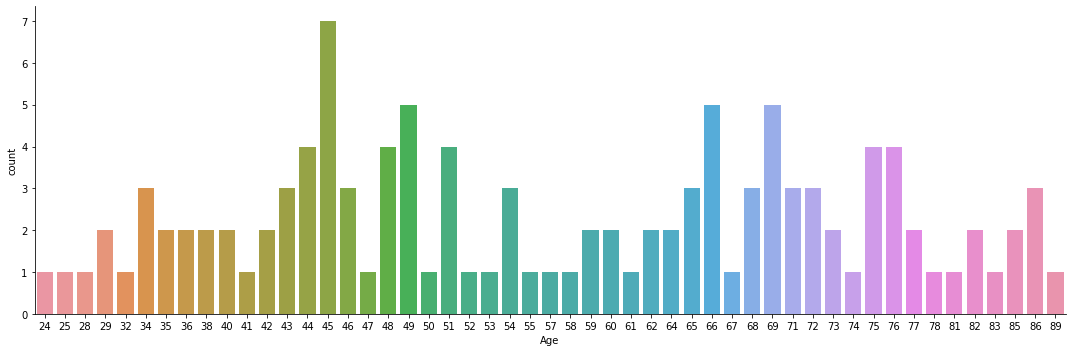

In [56]:
if len(list(filter(lambda x: 'seaborn ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install seaborn
    
import seaborn as sns
sns.catplot('Age',data=data,kind="count", aspect=3)

data['Age'].describe()

En el estudio hay personas de edad entre `24` y `89` años, siendo los mismos muy heterogeneos y con muestras significativas en algunas edades como `45` y `49` años.

Consideremos entonces que nos muestra la Glucosa:

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glucose, dtype: float64

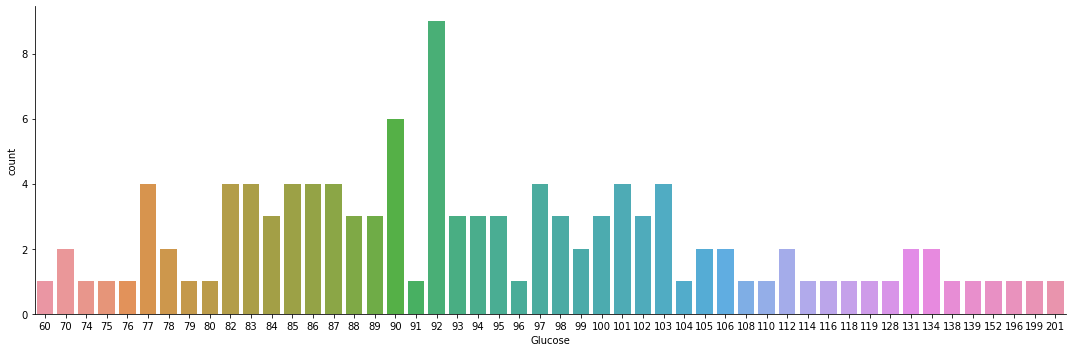

In [57]:
sns.catplot('Glucose',data=data,kind="count", aspect=3)
data['Glucose'].describe()

Se puede observar que el valor común es `92`, teniendo rango entre `60` a `20` mg /dL. Se puede hacer este estudio para el resto de variables pero no se obtienen resultados significantes ya que todas tiene valores casi no repetibles

Agrupemos el conjunto de datos según la clasificación y ver las características entre personas sanas y personas con cáncer. Veamos sus medias:

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692
2,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500


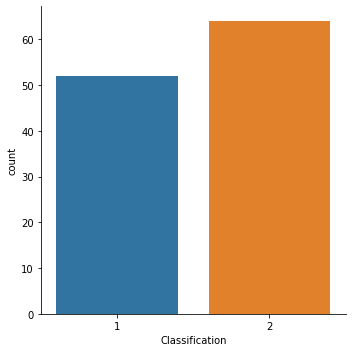

In [58]:
sns.catplot('Classification',data=data,kind="count")

grouped_data = data.groupby('Classification')
grouped_data.mean()

Podemos ver que el grupo 2 toma valores mas altos para la mayoria de indicadores excepto el BMI entre otros.

### Limpieza y preprocesado de los datos. 
Analizaremos los datos en busqueda de incongruencias


Verificamos si existen valores nulos en la información proporcionada

In [59]:
nulos = data.isnull().any()
print (nulos)

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


No tenemos datos nulos. Si hubieran existido con la función <i> fillna </i> los hubieramos sustituido por ejemplo con la media de la columna agregando un primer sesgo a la información

Verificamos el tipo de dato de cada columna:

In [60]:
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

Verificamos los datos del clasificador de pacientes:

In [61]:
pd.unique(data['Classification'])

array([1, 2], dtype=int64)

Entonces observemos en mas profundidad los datos:

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


### Ingeniería y selección de características

Definamos el conjunto X de variables predictoras y el conjunto Y de la variable objetivo:

In [63]:
if len(list(filter(lambda x: 'numpy ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install numpy
    
import numpy as np

X_data = data.iloc[:,0:9]
X_data
y_data = np.asarray(data["Classification"]).tolist()
X_names = X_data.columns.tolist()
y_names = ['Sanos', 'Pacientes']

Luego para saber como se distribuyen los datos vamos a usar el método `scatter_matrix`. En color morado corresponden las personas sanas (1) y el color amarillo a los pacientes (2).

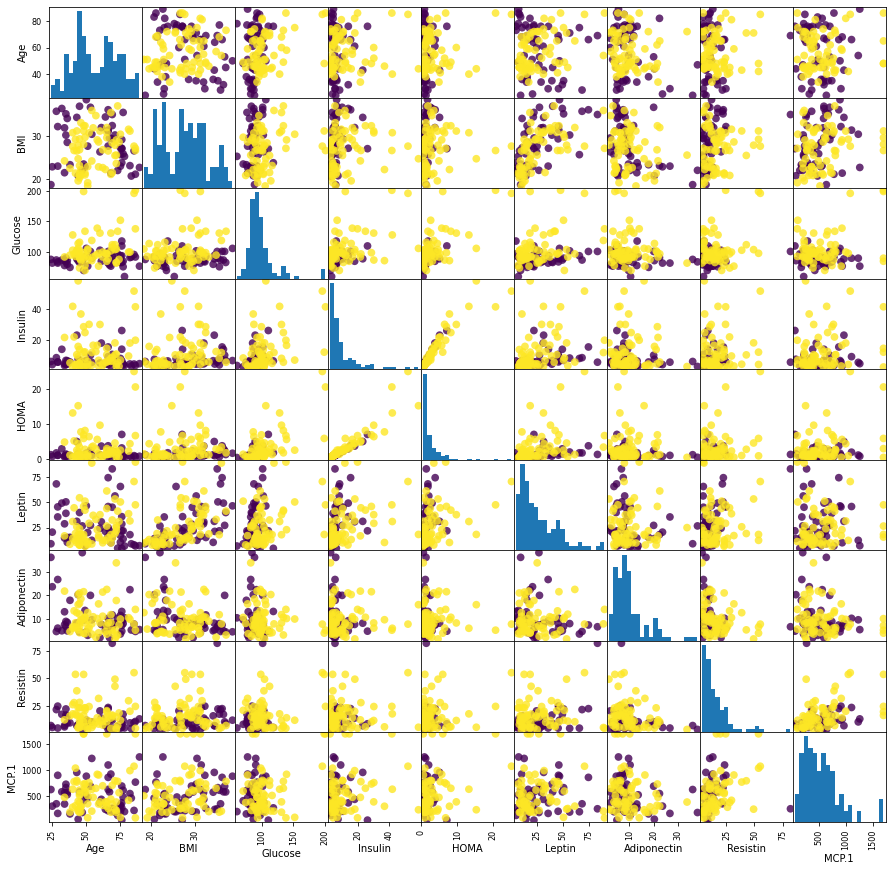

In [64]:
sp = pd.plotting.scatter_matrix(X_data, c=y_data, figsize=(15, 15), 
               marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

La dispersion segun se visualiza es alta asi que la clasificacion sera compleja. 

Este concepto se puede ver mejor viendo una estimacion sobre como se relacionan las variables usando el coeficiente de correlación de Pearson en un mapa de calor que nos proporciona la libreria Seaborn:

<AxesSubplot:title={'center':'Coeficiente de Correlación de Pearson entre los atributos'}>

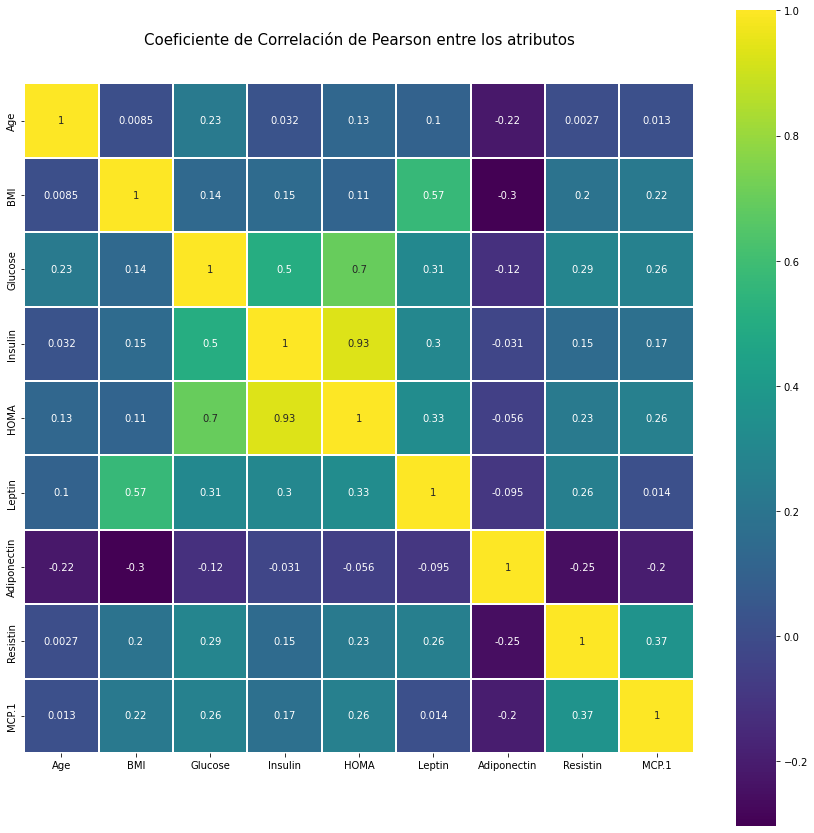

In [65]:
if len(list(filter(lambda x: 'matplotlib ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install matplotlib
    
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.title('Coeficiente de Correlación de Pearson entre los atributos', y=1.05, size=15)
sns.heatmap(X_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='viridis', linecolor='white', annot=True)

El coeficiente refleja la poca correlacion que existen entre los datos. Dentro de los que se destacan podemos mencionar a HOMA e insulina aunque a priori se sugiere que no descartemos ninguna caracteristica para generar un modelo predictivo

### Aprendizaje de modelos predictivos



#### Algoritmo de Arbol

Decidimos realizar un arbol que genere la predicción deseada dada la reducida cantidad de datos disponibles en el corpus de la Universidad asi como la no correlación a priori de los datos. Las ventajas que nos proporcionara un modelo de arbol son:
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX
* XXXXXXXXXXX

Dividimos el conjunto de datos en uno formado por el 75% de las observaciones que será el conjunto de entrenamiento y el test que constará del 25% de los datos:

In [66]:
if len(list(filter(lambda x: 'sklearn ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install sklearn
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

Creamos el arbol correspondiente:

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Entrenamos el modelo con los datos de entrenamiento y con los parámetros por defecto:

In [68]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

Veamos cuales son las variables de mayor `importancia` en este modelo:

In [69]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,Age,0.259
7,Resistin,0.201
2,Glucose,0.182
1,BMI,0.177
6,Adiponectin,0.100
8,MCP.1,0.044
5,Leptin,0.039
3,Insulin,0.000
4,HOMA,0.000


En conclusion las variables de mayor importancia en nuestro modelo son la edad, Glucosa y BMI. La que menos repercusión tiene es Insulina, seguida de HOMA.

Veamos gráficamente cómo es el árbol obtenido:

In [70]:
# !conda install --yes --prefix {sys.prefix} python-graphviz

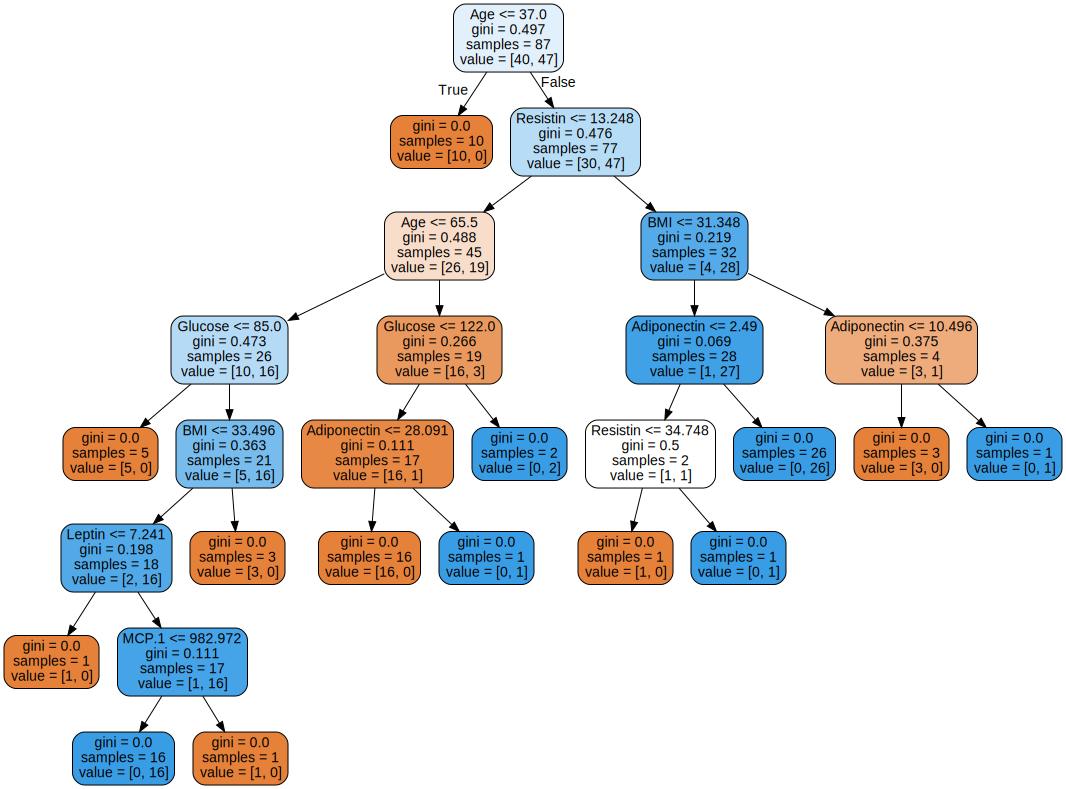

In [71]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display, Image

export_graphviz(
    model,
    out_file="arbol_1.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)

with open("arbol_1.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Cada nodo interno del árbol anterior muestra información sobre el criterio de separación, el grado de dispersión del nodo, el número de ejemplos del conjunto de entrenamiento asociados a ese nodo y la distribución de valores de clasificación para dichos ejemplos. De esta forma el arbol clasifica todos los ejemplos de nuestro conjunto de entrenamiento.

Vamos a evaluar el rendimiento del árbol calculando el rendimiento con el conjunto de test, luego para obtener una medida de rendimiento, vamos a comparar estos valores con los reales:

In [72]:
pred = model.predict(X_test)
sum(x1==x2 for x1,x2 in zip(pred,y_test))/len(y_test)

0.8275862068965517

El árbol que hemos construido tiene un acierto de más del `76%`. Veámoslo con mayor precisión:

In [73]:
scores_arbol = model.score(X_test,y_test)
print("Rendimiento en el conjunto de entrenamiento: ",model.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",model.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",model.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8275862068965517
Rendimiento en el conjunto total:  0.9568965517241379


En el conjunto total tenemos un acierto del `94%` y en el conjunto prueba del `76%`. Veamos las matrices de confusión:

In [74]:
from sklearn import metrics as skm

print('### Matrices de confusión ###\n')
print('Entrenamiento:')
print(skm.confusion_matrix(y_train, model.predict(X_train)))
print('\nPruebas:')
print(skm.confusion_matrix(y_test, model.predict(X_test)))

tn, fp, fn, tp = skm.confusion_matrix(y_test, model.predict(X_test)).ravel()
accuracy = (tn + tp) / (tn + fp + tp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)     
f1 = ((precision * recall)/(precision + recall)) * 2

print("\nAccuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1 Score: " +str(f1))


### Matrices de confusión ###

Entrenamiento:
[[40  0]
 [ 0 47]]

Pruebas:
[[11  1]
 [ 4 13]]

Accuracy: 0.8275862068965517
Precision: 0.9285714285714286
Recall: 0.7647058823529411
F1 Score: 0.8387096774193549


En el conjunto de entrenamiento había `40` personas sanas y `47` pacientes con cáncer de mama. El modelo que hemos construido clasifica bien a `10` personas sanas y a `13` personas con cáncer, sin embargo, hay `6` personas a las que ha clasificado de forma incorrecta. Hay `2` personas con cáncer que han sido clasificadas como sanas y `4` sanas clasificadas como pacientes.

### Validación, ajuste (de hiper-parámetros) y evaluación (métricas)

#### Validación cruzada sin estratificación:

Realizaremos una validación cruzada con 10 iteraciones sin estratificación usando como medida <i> accuracy</i>. Para ello se usan las funciones *StratifiedKFold* y *cross_val_score*.

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cross_validation = StratifiedKFold(n_splits = 10, shuffle = False )
scorescvs = cross_val_score(model, X_train, y_train, 
            scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv = scorescvs.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv, scorescvs.std() * 2) )

Exactitud (accuracy): 0.69306 (+/- 0.32666)


Hemos obtenido un rendimiento del `67%`. Vamos a tratar de mejorarlo usando estratificación.

Realizaremos una validación cruzada con 10 iteraciones, usando <i> accuracy </i> y estratificación (*shuffle = True*) :

In [76]:
cross_validation = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222 )
scorescve = cross_val_score(model, X_train, y_train, 
                                 scoring = "accuracy", cv = cross_validation, n_jobs = 1 )

scores_cv_e = scorescve.mean()
print( "Exactitud (accuracy): %0.5f (+/- %0.5f)" % (scores_cv_e, scorescve.std() * 2) )

Exactitud (accuracy): 0.72361 (+/- 0.32022)


Tenemos un acierto del `70%` el cual no mejora el modelo inicial.

Vamos a ver otras medidas para mejorar el acierto como <i> balanced_accuracy </i> o <i>roc_auc </i> en vez de <i> accuracy </i>: 

In [77]:
scores_bal = cross_val_score(model, X_train, y_train, 
                                 scoring = "balanced_accuracy", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (balanced_accuracy): %0.5f (+/- %0.5f)" % (scores_bal.mean(), scores_bal.std() * 2) )

scores_roc = cross_val_score(model, X_train, y_train, 
                                 scoring = "roc_auc", cv = cross_validation, n_jobs = 1 )
print( "Exactitud (roc_auc): %0.5f (+/- %0.5f)" % (scores_roc.mean(), scores_roc.std() * 2) )

Exactitud (balanced_accuracy): 0.71000 (+/- 0.24718)
Exactitud (roc_auc): 0.70750 (+/- 0.36059)


El arbol obtiene `75%` y `68%` respectivamente.

#### Poda
En general los árboles de decisión tienden a ajustarse demasiado por lo que se les produce sobreajuste con los datos de entrenamiento. En estos casos puede realizarse una poda. La función *DecisionTreeClassifier* cuenta con el parámetro *ccp_alpha* que brinda el valor mínimo y maximo (umbral) que es efectivo. También tenemos el parámetro *cost_complexity_pruning_path* que implementa el proceso de poda y devuelve tanto los valores de $\alpha$ efectivos como las impurezas.


In [78]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Verificamos los datos obtenidos:

Text(0.5, 1.0, 'Impureza total frente a alpha efectiva para el conjunto de entrenamiento')

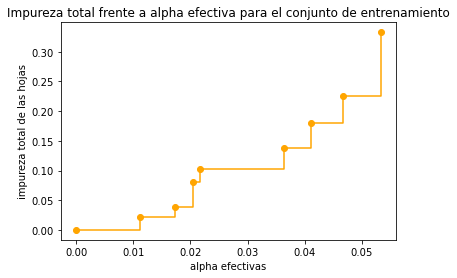

In [79]:
ig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color='orange')
ax.set_xlabel("alpha efectivas")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("Impureza total frente a alpha efectiva para el conjunto de entrenamiento")

Ahora, entrenamos un árbol de decisión usando los valores efectivos de alpha. El último valor de *ccp_alphas* es el valor alpha que poda todo el árbol, dejando el árbol con un solo nodo.

In [80]:
arboles_poda = []
for ccp_alpha in ccp_alphas:
    arbol_poda = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    arbol_poda.fit(X_train, y_train)
    arboles_poda.append(arbol_poda)
print("El número de nodos en el último árbol es: {} para ccp_alpha: {}".format(
      arboles_poda[-1].tree_.node_count, ccp_alphas[-1]))

El número de nodos en el último árbol es: 1 para ccp_alpha: 0.08197031752323072


Eliminamos el último elemento de *arbol_poda* y *ccp_alphas* ya que es el árbol formado por un solo nodo.

In [81]:
arboles_poda = arboles_poda[:-1]
ccp_alphas = ccp_alphas[:-1]

Veamos cómo varía el rendimiento para los distintos valores de alpha:

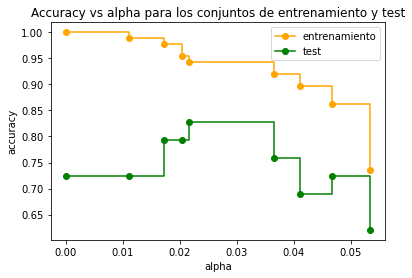

In [82]:
train_scores = [arbol_poda.score(X_train, y_train) for arbol_poda in arboles_poda]
test_scores = [arbol_poda.score(X_test, y_test) for arbol_poda in arboles_poda]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para los conjuntos de entrenamiento y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento",
        drawstyle="steps-post", color='orange')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color='green')
ax.legend()
plt.show()

Veamos cuál es el mejor valor:

In [83]:
index_best_model = np.argmax(test_scores)
best_model = arboles_poda[index_best_model]
scores_poda = best_model.score(X_test, y_test)
print('Accuracy del mejor modelo en el conjunto de entrenamiento: ',best_model.score(X_train, y_train))
print('Accuracy del mejor modelo en el conjunto test: ',scores_poda)

Accuracy del mejor modelo en el conjunto de entrenamiento:  0.9425287356321839
Accuracy del mejor modelo en el conjunto test:  0.8275862068965517


El rendimiento es del `83%`, luego es una mejora a los anteriores. Veamos también el árbol podado resultante:

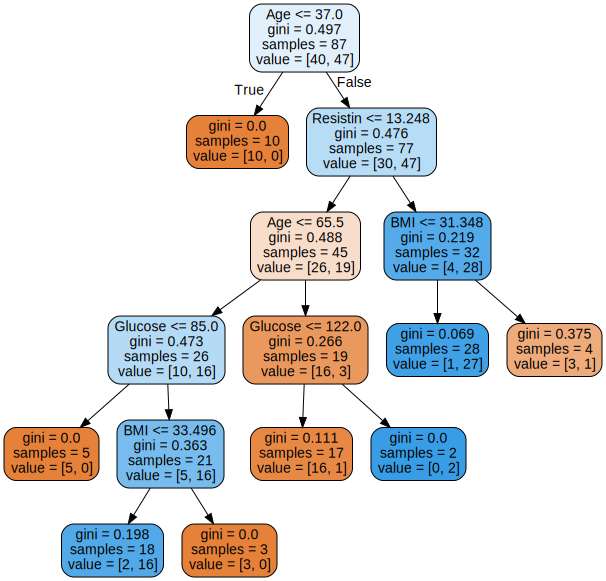

In [84]:
export_graphviz(
    best_model,
    out_file="arbol_2.dot",
    feature_names=X_names,
    rounded=True,
    filled=True)
with open("arbol_2.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Obtenemos un árbol podado de profundidad `6`. Como podemos observar es un árbol mucho más pequeño que el inicial y con un gran rendimiento.

### Evaluación final del modelo

Por último, veamos una tabla resumen de los modelos que hemos usado y sus rendimientos.

In [85]:
if len(list(filter(lambda x: 'tabulate ' in x, libraryList))) == 0:
    !{sys.executable} -m pip install tabulate
    
from tabulate import tabulate
rend = [['Árbol base', scores_arbol],
         ['Árbol base con validación cruzada sin estratificación', scores_cv],
         ['Árbol base con validación cruzada con estratificación', scores_cv_e],
         ['Árbol podado',scores_poda]]
        
      
print(tabulate(rend, headers=['Modelo', 'Rendimiento']))

Modelo                                                   Rendimiento
-----------------------------------------------------  -------------
Árbol base                                                  0.827586
Árbol base con validación cruzada sin estratificación       0.693056
Árbol base con validación cruzada con estratificación       0.723611
Árbol podado                                                0.827586


El árbol podado tiene un rendimiento de `83%`. Es el mejor modelo tanto en efectividad como en tamaño para predecir el cáncer de mama a través de los atributos: Edad, IMC, Glucosa, HOMA, Insulina, Adiponectina, Leptina, Resistina y MCP-1 del set de datos.

ultimo markdown asi vamos cargando los titulos


### Ingeniería y selección de características. El uso de técnicas de selección de características y/o de reducción de la dimensionalidad será decisión del alumno.
### Aprendizaje de modelos predictivos (clasificación o regresión). Debe probarse más de un algoritmo para obtener el mayor rendimiento posible.
### Validación, ajuste (de hiper-parámetros) y evaluación (métricas) de los distintos modelos candidatos
### Evaluación final del modelo finalmente seleccionado y presentación de resultados.